This script refers to the example from O. Galor, 2007, Discrete dynamical systems, Ch. 6.

It creates the phase diagram in the $(x_1, x_2)$ plane for the first-order linear autonomous two-dimensional system of difference equations:

$$
\begin{bmatrix}
x_{1,t+1} \\
x_{2,t+1} \\
\end{bmatrix}
=
\begin{bmatrix}
4 & 1  \\
7 & 2.5 
\end{bmatrix}
\begin{bmatrix}
x_{1,t} \\
x_{2,t} \\
\end{bmatrix}.
$$



(-150.0, 150.0, -150.0, 150.0)

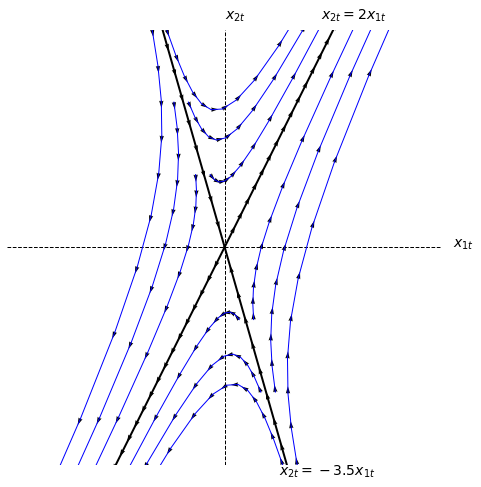

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


#%% Find the eigenvalues and eigenvectors of A.
A = ((4, 1),
     (7, 2.5))
A = np.array(A)
evals, evecs = np.linalg.eig(A)

# Eigenvector are normalized. Let's rescale them
# to mimic the book example.
evecs[:,0] *= (1/evecs[0,0])
evecs[:,1] *= (1/evecs[0,1])


#%% Create the points on the manifolds.
# There are 4 different combinations to show
# divergence or convergence to equilibrium.
np_eff = 100
effe_n = np.arange(-np_eff, 5, 5) # negative
effe_p = np.arange(0, np_eff, 5) # positive
f12_p = evecs[1,0]*effe_p # f12 positive
f22_p = evecs[1,1]*effe_p # f22 positive
f12_n = evecs[1,0]*effe_n # f12 negative
f22_n = evecs[1,1]*effe_n # f22 negative


#%% Initialize the figure
# Set length of axes
xylim = 150
x_min, x_max = -xylim, xylim
y_min, y_max = -xylim, xylim

# Create an empty figure with axes
fig, ax = plt.subplots(figsize=(10, 8))
npo = 100
x = np.linspace(x_min, x_max, 100)
y = np.zeros(npo)
ax.plot(x, y, 'k--', lw=1)
ax.plot(y, x, 'k--', lw=1)


#%% Outline the manifolds.
# Normalize and rescale the eigenvectors for
# a better visualization with quiver.
norm_evecs = evecs/np.linalg.norm(evecs) 
norm_evecs *= [10, 6]

# Manifold 1
ax.plot(effe_n, f12_n, 'k', lw=2)
ax.quiver(effe_n[:-1], f12_n[:-1], -norm_evecs[0,0], -norm_evecs[1,0], scale_units='xy', angles='xy',
          scale=1)
ax.plot(effe_p, f12_p, 'k', lw=2)
ax.quiver(effe_p[1:], f12_p[1:], norm_evecs[0,0], norm_evecs[1,0], scale_units='xy', angles='xy',
          scale=1)
# Manifold 2
ax.plot(effe_n, f22_n, 'k', lw=2)
ax.quiver(effe_n[:-1], f22_n[:-1], norm_evecs[0,1], norm_evecs[1,1], scale_units='xy', angles='xy',
          scale=1)
ax.plot(effe_p, f22_p, 'k', lw=2)
ax.quiver(effe_p[1:], f22_p[1:], -norm_evecs[0,1], -norm_evecs[1,1], scale_units='xy', angles='xy',
          scale=1)


#%% Define a function that creates the trajectory given initial values
def fun_traject(x10, x20, ts, resc):
    # Define Q
    Q = evecs 
    inv_Q = np.linalg.inv(Q) # inverse of Q
    # Write y_0 with inv_Q
    y_10 = inv_Q[0][0]*x10 + inv_Q[0][1]*x20 
    y_20 = inv_Q[1][0]*x10 + inv_Q[1][1]*x20   
    # Define x1 and x2
    x1 = evecs[0][0]*evals[0]**ts*y_10 + evecs[0][1]*evals[1]**ts*y_20
    x2 = evecs[1][0]*evals[0]**ts*y_10 + evecs[1][1]*evals[1]**ts*y_20
    # Direction vector at every point of the trajectory
    dx = np.zeros([len(ts),2])
    for idx in range(len(x1)-1):
        dx[idx,0] = (x1[idx+1]-x1[idx])/2
        dx[idx,1] = (x2[idx+1]-x2[idx])/2
        dx[idx,:] = dx[idx,:]/np.linalg.norm(dx[idx,:])
    dx *= resc  #  rescale dx
    return x1, x2, dx

#%% Set the initial conditions
x0 = [[-40,  150],
      [-25,  100],
      [-10,   50],
      [ 40, -150],
      [ 25, -100],
      [ 10,  -50],
      [ 50, -150],
      [ 35, -100],
      [ 20,  -50],
      [-50,  150],
      [-35,  100],
      [-20,   50]]
x0 = np.array(x0)

#%% Trace out the trajectories and directions
tis = np.linspace(0,10, 50)  # time
for ii in range(len(x0)):
    x_1, x_2, dx = fun_traject(x0[ii,0], x0[ii,1], tis, 10)
    ax.plot(x_1, x_2, color='b', lw=1)
    ax.quiver(x_1, x_2, dx[:,0], dx[:,1], scale_units='xy', angles='xy', scale=2)

#%% Adjust axes and add text 
fsz = 14
ax.text(x_max*(1.05), 0, '$x_{1t}$', fontsize=fsz)
ax.text(0, y_max*(1.05), '$x_{2t}$', fontsize=fsz)
ax.text(x_max/2.25, y_max*(1.05), '$x_{2t}=2x_{1t}$', fontsize=fsz)
ax.text(x_max/4, -y_max*(1.05), '$x_{2t}=-3.5 x_{1t}$', fontsize=fsz)
ax.axis('square')
ax_range = [x_min, x_max, y_min, y_max]
ax.axis(ax_range)
ax.axis('off')